# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# to install the citipy library
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=dff712b7927913d0ca9c67b0d98ca01bfac2e1615b8feb740a3b97844b907bf9
  Stored in directory: c:\users\223005380\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# Perform a weather check on each city using a series of successive API calls
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#cities = ["Paris", "London","Oslo","Behijing","Mexico City"]  #this line was added just for testing purposes

url = "http://api.openweathermap.org/data/2.5/weather?"
count = 1

city_found = []    
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
min_temp = []
max_temp = []
wind_speed = []


for city in cities:
    try:
        endpoint = f"{url}appid={weather_api_key}&q={city}&units=imperial"
        #print (endpoint)
        response = requests.get(endpoint).json()
         
        city_found.append(response["name"])
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        min_temp.append(response["main"]["temp_min"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}")
        count = count + 1
        
    except:
        print(f"{city} city not found. Skipping...")


Processing Record 1 | smirnykh
Processing Record 2 | hilo
Processing Record 3 | new norfolk
taolanaro city not found. Skipping...
Processing Record 4 | chuy
Processing Record 5 | marienburg
Processing Record 6 | rikitea
Processing Record 7 | esperance
dolbeau city not found. Skipping...
belushya guba city not found. Skipping...
mys shmidta city not found. Skipping...
Processing Record 8 | waipawa
Processing Record 9 | atuona
Processing Record 10 | polunochnoye
Processing Record 11 | wattegama
Processing Record 12 | vaini
Processing Record 13 | kawalu
Processing Record 14 | carnarvon
Processing Record 15 | upernavik
Processing Record 16 | busselton
Processing Record 17 | bluff
Processing Record 18 | pevek
Processing Record 19 | jamestown
Processing Record 20 | saint marys
Processing Record 21 | butaritari
Processing Record 22 | henties bay
Processing Record 23 | lethem
Processing Record 24 | port alfred
Processing Record 25 | tiksi
Processing Record 26 | ushuaia
Processing Record 27 | m

Processing Record 229 | nishihara
Processing Record 230 | egvekinot
Processing Record 231 | honningsvag
Processing Record 232 | maniitsoq
Processing Record 233 | alofi
palabuhanratu city not found. Skipping...
Processing Record 234 | kodiak
Processing Record 235 | aksarka
Processing Record 236 | ust-nera
Processing Record 237 | baykit
Processing Record 238 | inta
Processing Record 239 | quatre cocos
Processing Record 240 | chumikan
Processing Record 241 | riviere-au-renard
lolua city not found. Skipping...
Processing Record 242 | souillac
ruatoria city not found. Skipping...
Processing Record 243 | moose factory
Processing Record 244 | sitka
Processing Record 245 | honiara
Processing Record 246 | itacare
Processing Record 247 | amalapuram
Processing Record 248 | kulhudhuffushi
Processing Record 249 | fuchu
Processing Record 250 | redmond
Processing Record 251 | antigonish
Processing Record 252 | bilma
Processing Record 253 | yatou
Processing Record 254 | geraldton
Processing Record 255

Processing Record 454 | creel
Processing Record 455 | saquarema
Processing Record 456 | ostrovnoy
Processing Record 457 | jalu
Processing Record 458 | riyadh
Processing Record 459 | tsuruoka
Processing Record 460 | brownsville
Processing Record 461 | odweyne
Processing Record 462 | turukhansk
Processing Record 463 | cockburn town
Processing Record 464 | roald
Processing Record 465 | zhigansk
Processing Record 466 | batemans bay
Processing Record 467 | kavaratti
Processing Record 468 | muzhi
Processing Record 469 | talnakh
Processing Record 470 | shache
Processing Record 471 | maksatikha
Processing Record 472 | juba
Processing Record 473 | damavand
Processing Record 474 | pasighat
Processing Record 475 | kedougou
Processing Record 476 | warri
Processing Record 477 | touros
Processing Record 478 | saint george
Processing Record 479 | wanaka
canitas city not found. Skipping...
Processing Record 480 | kuala sungai baru
Processing Record 481 | zacualpan
zarakes city not found. Skipping...
P

In [57]:
len(city_found)

580

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#Display the DataFrame
callresults_df = pd.DataFrame({
    "City": city_found,
    "Cloudiness": cloudy,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Temp": temp,
    "Min Temp": min_temp,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})
callresults_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Min Temp,Max Temp,Wind Speed
0,Smirnykh,67,RU,1603261147,73,49.75,142.83,46.98,46.98,46.98,3.29
1,Hilo,1,US,1603261147,73,19.73,-155.09,71.60,69.01,75.20,3.36
2,New Norfolk,100,AU,1603261127,53,-42.78,147.06,59.20,57.99,61.00,1.34
3,Chui,100,UY,1603261061,73,-33.70,-53.46,57.47,57.47,57.47,12.19
4,Malbork,100,PL,1603261148,90,54.04,19.03,47.34,46.99,48.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...
575,Centralia,1,US,1603261296,100,46.72,-122.95,42.12,37.99,44.60,2.44
576,Nabire,100,ID,1603261296,87,-3.37,135.48,78.48,78.48,78.48,2.26
577,Starkville,1,US,1603261297,100,33.45,-88.82,61.27,59.00,63.00,3.83
578,Yangi Marg`ilon,0,UZ,1603261164,32,40.43,71.72,66.20,66.20,66.20,4.70


In [55]:
callresults_df.count()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Lng           580
Temp          580
Min Temp      580
Max Temp      580
Wind Speed    580
dtype: int64

In [56]:
#Export the city data into a .csv.
callresults_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

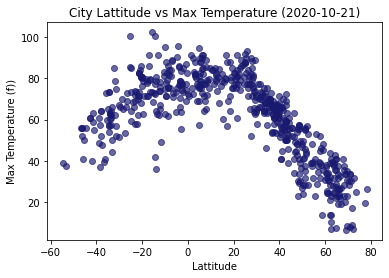

In [77]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, max_temp, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.title(f"City Lattitude vs Max Temperature ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
plt.savefig("output_data/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

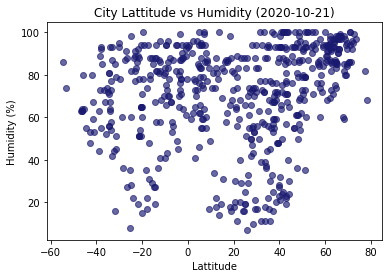

In [80]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, humidity, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.title(f"City Lattitude vs Humidity ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

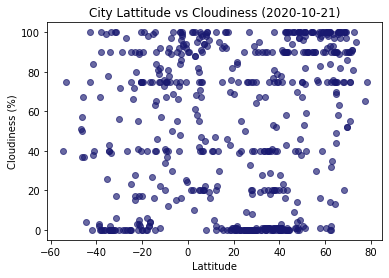

In [81]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, cloudy, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.title(f"City Lattitude vs Cloudiness ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

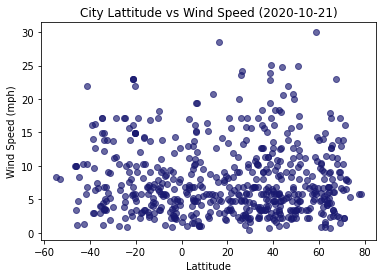

In [83]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

plt.scatter(lat, wind_speed, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
#plt.plot(Capomulin_weight, regress_values,"r-")
#plt.annotate(line_eq,(17,25.47214326),fontsize=15,color="red")
plt.title(f"City Lattitude vs Wind Speed ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots

In [109]:
# Create Northern Hemisphere DataFrames
northern_df = callresults_df.loc[(callresults_df["Lat"]>0)]
northern_df.to_csv("output_data/northern.csv", index=False, header=True)
northern_df.keys()

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Temp', 'Min Temp', 'Max Temp', 'Wind Speed'],
      dtype='object')

In [92]:
# Create Southern Hemisphere DataFrames
southern_df = callresults_df.loc[(callresults_df["Lat"]<0)]
southern_df.to_csv("output_data/southern.csv", index=False, header=True)
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Min Temp,Max Temp,Wind Speed
2,New Norfolk,100,AU,1603261127,53,-42.78,147.06,59.20,57.99,61.00,1.34
3,Chui,100,UY,1603261061,73,-33.70,-53.46,57.47,57.47,57.47,12.19
5,Rikitea,28,PF,1603261148,77,-23.12,-134.97,73.98,73.98,73.98,9.15
6,Esperance,90,AU,1603261149,93,-33.87,121.90,62.60,62.60,62.60,14.99
7,Waipawa,38,NZ,1603261150,67,-41.41,175.52,57.61,55.99,59.00,21.92
...,...,...,...,...,...,...,...,...,...,...,...
543,Mocuba,2,MZ,1603261287,31,-16.84,36.99,91.18,91.18,91.18,8.23
550,Oranjemund,0,NA,1603261098,36,-28.55,16.43,65.17,65.17,65.17,11.30
558,Kawerau,100,NZ,1603261291,92,-38.10,176.70,63.21,62.01,64.00,2.98
572,Esmeraldas,90,BR,1603261211,100,-19.76,-44.31,62.60,62.60,62.60,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model is: y = -0.95x + 93.82
The correlation coefficient is -0.88
The r-squared (goodness of fit) is: 0.7778048873086115


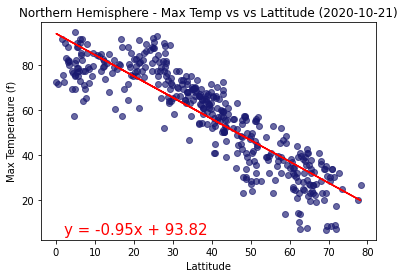

In [119]:
x = northern_df["Lat"]
y = northern_df["Max Temp"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
plt.savefig("output_data/northern_fig1.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model is: y = 0.62x + 82.81
The correlation coefficient is 0.61
The r-squared (goodness of fit) is: 0.3734040488036495


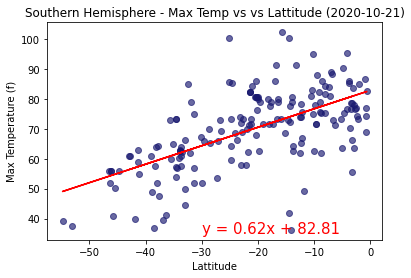

In [123]:
x = southern_df["Lat"]
y = southern_df["Max Temp"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (f)")
plt.savefig("output_data/southern_fig1.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model is: y = 0.38x + 56.95
The correlation coefficient is 0.31
The r-squared (goodness of fit) is: 0.09741932462142788


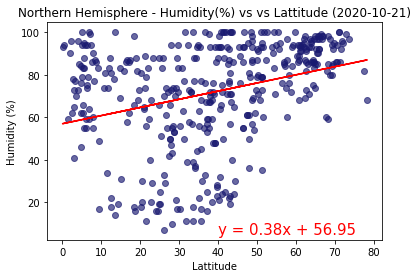

In [125]:
x = northern_df["Lat"]
y = northern_df["Humidity"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/northern_fig2.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model is: y = 0.24x + 74.32
The correlation coefficient is 0.15
The r-squared (goodness of fit) is: 0.02302655025156176


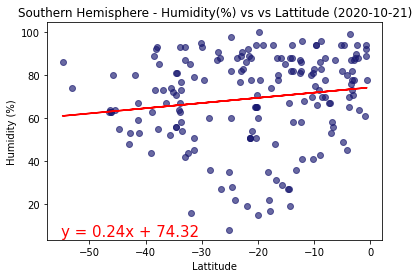

In [127]:
x = southern_df["Lat"]
y = southern_df["Humidity"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/southern_fig2.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model is: y = 0.52x + 33.2
The correlation coefficient is 0.26
The r-squared (goodness of fit) is: 0.06775868768319161


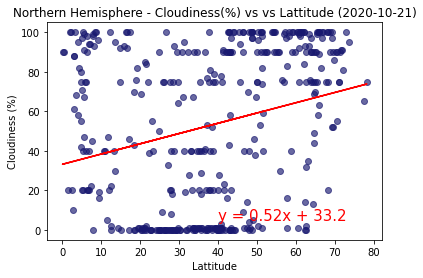

In [128]:
x = northern_df["Lat"]
y = northern_df["Cloudiness"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/northern_fig3.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model is: y = 0.89x + 68.22
The correlation coefficient is 0.32
The r-squared (goodness of fit) is: 0.10303756674403272


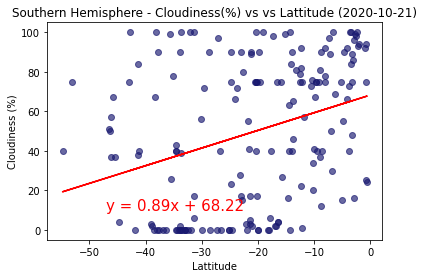

In [130]:
x = southern_df["Lat"]
y = southern_df["Cloudiness"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-47,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Cloudiness(%) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/southern_fig3.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model is: y = 0.01x + 7.64
The correlation coefficient is 0.02
The r-squared (goodness of fit) is: 0.0003693262905068489


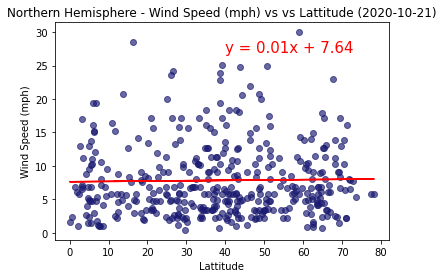

In [133]:
x = northern_df["Lat"]
y = northern_df["Wind Speed"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/northern_fig4.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model is: y = -0.06x + 6.75
The correlation coefficient is -0.15
The r-squared (goodness of fit) is: 0.02305283200552325


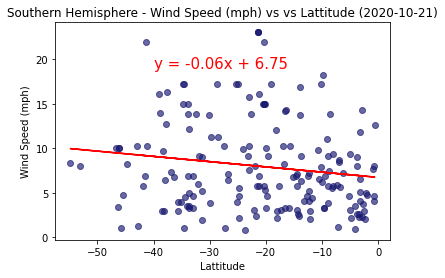

In [137]:
x = southern_df["Lat"]
y = southern_df["Wind Speed"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The linear regression model is: {line_eq}')
print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"The r-squared (goodness of fit) is: {rvalue**2}")

plt.scatter(x, y, alpha = 0.65, color = "midnightblue") #"navy"midnightblue"darkblue"blue""darkslateblue
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-40,19),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs vs Lattitude ({date.today()})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/southern_fig4.png")
plt.show()